In [10]:
''' 
    PROBLEM STATEMENTS:

    1) Analyse the data-set given by the customer.
    2) Check whether the given data-set contains any null values or not.
       if yes : remove null values or replace null values by using central-tendency variation.
       if not : you can proceed with the same data-set.
    3) Check all the column data-values is correctly formatted to their column name.
       if yes : you can proceed with the same data-set.
       if not : you can convert into correct format
    
    PROJECT TITLE : AIR QUALITY DATA IN INDIA FROM 2015 TO 2020 
    
    PROJECT OBJECTIVE:
    
    1) find top 10 maximum pm10 value for each city and represent the final data.
    2) find the percentage of AQI for different levels
 
'''
import pandas as pd

# READING CSV FILE
DS = pd.read_csv("city_day.csv")
DS
    

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 c

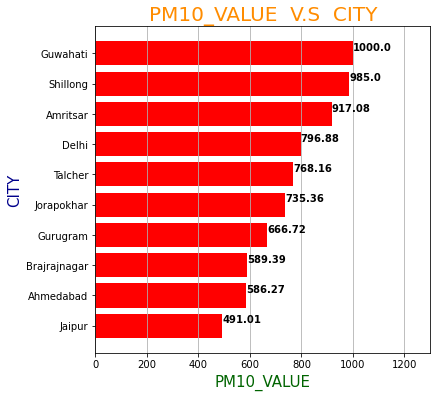

In [3]:
# 1) find top 10 maximum pm10 value for each city and represent the final data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# READING CSV FILE
Data_set = pd.read_csv("city_day.csv")
Data_set.info()

# CONVERTING OBJECT INTO DATE
Data_set['Date'] = pd.to_datetime(Data_set['Date'], format='%d-%m-%Y')
Data_set.info()

# ARRANGE CITY COLUMN IN ASCENDING ORDER
city_order = Data_set.sort_values(by = 'City',ascending = True)

# STORE CITY COLUMN IN ANOTHER VARIABLE WITH UNIQUE VALUES
place = city_order['City'].unique()
print(place)

# GROUP THE DATA-SET RELATE TO CITY COLUMN
city = Data_set.groupby('City') 
city.first()

# FIND MAXIMUM PM10_VALUE FOR EACH CITY 
pm10 = city.agg({'PM10': ['max']})
print(pm10)

# ADD CITY COLUMN TO PM10_MAX COLUMN
pm10['CITY'] = place

# ARRANGE PM10_VALUES IN DESCENDING ORDER
new_set = pm10.sort_values(by = [('PM10', 'max')],ascending = False)

# CONVERT DATAFRAME INTO NUMPY_ARRAY
CITY = new_set['CITY'][0:10].to_numpy()[::-1]
PM10 = new_set[('PM10', 'max')][0:10].to_numpy()[::-1]

# INCREASE SIZE OF THE FIGURE
fig, ax = plt.subplots(figsize =(6, 6))
ax.barh(CITY, PM10, color = 'red')
for i in ax.patches:
    plt.text(i.get_width()+0.7, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10,fontweight ='bold',color ='black')

# RANGE FOR X AXIS
plt.xlim(0,1300)
plt.title("PM10_VALUE  V.S  CITY", c = 'darkorange',fontsize = 20)
plt.xlabel("PM10_VALUE",c = 'darkgreen',fontsize = 15)
plt.ylabel("CITY",c = 'darkblue',fontsize = 15)
plt.grid(axis = 'x')
plt.show()

[209. 328. 514. ...  68.  54.  50.]
AQI_GOOD :  1341
AQI_MODERATE :  8224
AQI_UNHEALTHY_SENSITIVE :  6211
AQL_UNHEALTHY :  2618
AQL_VERY_UNHEALTHY :  2781
AQL_HAZARDOUS :  3675
TOTAL_AQL :  4136620.0
AQI_GOOD_PER :  0.03241777103045482
AQI_MODERATE_PER :  0.19880965619273705
AQI_UNHEALTHY_SENSITIVE_PER :  0.15014673815820645
AQL_UNHEALTHY_PER :  0.06328838520337861
AQL_VERY_UNHEALTHY_PER :  0.06722880032490293
AQL_HAZARDOUS_PER :  0.08884064767853948


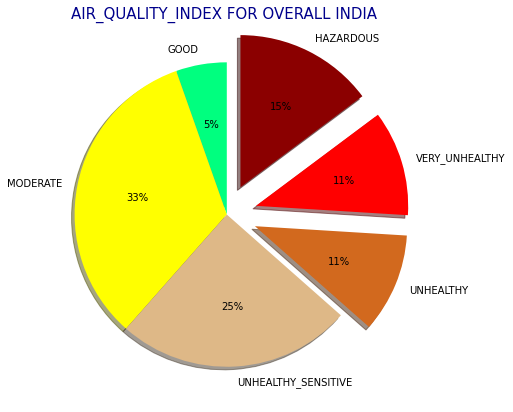

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# READING CSV FILE
Data_set = pd.read_csv("city_day.csv")

# REMOVE NULL_VALUES & CONVERT INTO NUMPY
Fil_Data_set = Data_set['AQI'].dropna().to_numpy()
print(Fil_Data_set)

# DECLARE L1_COUNT TO L6_COUNT AS 0
L1_count = L2_count = L3_count = L4_count = L5_count = L6_count = 0

# FIND THE FREQUENCY FOR EACH AQI_LEVELS
for i in range(len(Fil_Data_set)):
    if Fil_Data_set[i]>=0 and Fil_Data_set[i]<= 50:
        L1_count+= 1
    elif Fil_Data_set[i]>=51 and Fil_Data_set[i]<= 100:
        L2_count+= 1
    elif Fil_Data_set[i]>=101 and Fil_Data_set[i]<= 150:
        L3_count+= 1
    elif Fil_Data_set[i]>=151 and Fil_Data_set[i]<= 200:
        L4_count+= 1
    elif Fil_Data_set[i]>=201 and Fil_Data_set[i]<= 300:
        L5_count+= 1
    else:
        L6_count+= 1

# DISPLAY THE FREQUENCY FOR EACH AQI_LEVELS
print("AQI_GOOD : ",L1_count)
print("AQI_MODERATE : ",L2_count)
print("AQI_UNHEALTHY_SENSITIVE : ",L3_count)
print("AQL_UNHEALTHY : ",L4_count)
print("AQL_VERY_UNHEALTHY : ",L5_count)
print("AQL_HAZARDOUS : ",L6_count)

# FIND THE TOTAL FREQUENCY
TOTAL_AQL = Fil_Data_set.sum()
print("TOTAL_AQL : ",TOTAL_AQL)

# FIND THE PERCENTAGE OF FOR EACH AQI_LEVELS
GOOD = (L1_count/TOTAL_AQL)*100
MODERATE = (L2_count/TOTAL_AQL)*100
UNHEALTHY_SENSITIVE = (L3_count/TOTAL_AQL)*100
UNHEALTHY = (L4_count/TOTAL_AQL)*100
VERY_UNHEALTHY = (L5_count/TOTAL_AQL)*100
HAZARDOUS = (L6_count/TOTAL_AQL)*100

# DISPLAY THE PERCENTAGE OF FOR EACH AQI_LEVELS
print("AQI_GOOD_PER : ",GOOD)
print("AQI_MODERATE_PER : ",MODERATE)
print("AQI_UNHEALTHY_SENSITIVE_PER : ",UNHEALTHY_SENSITIVE)
print("AQL_UNHEALTHY_PER : ",UNHEALTHY)
print("AQL_VERY_UNHEALTHY_PER : ",VERY_UNHEALTHY)
print("AQL_HAZARDOUS_PER : ",HAZARDOUS)

# PLOT _ATTRIBUTES 
LEVELS = [GOOD, MODERATE, UNHEALTHY_SENSITIVE, UNHEALTHY, VERY_UNHEALTHY, HAZARDOUS]
NAMES = ["GOOD", "MODERATE", "UNHEALTHY_SENSITIVE", "UNHEALTHY", "VERY_UNHEALTHY", "HAZARDOUS"]
COLOUR = ["SpringGreen","Yellow","BurlyWood","Chocolate","red","darkred"]
SEP = [0, 0, 0, 0.2, 0.2, 0.2]

# PIE_PLOT 
fig, ax = plt.subplots(figsize =(7, 7))
plt.pie(LEVELS,labels = NAMES, colors = COLOUR,startangle = 90,autopct = '%1.0f%%', explode = SEP, shadow = True)
plt.title("AIR_QUALITY_INDEX FOR OVERALL INDIA ", c = 'darkblue',fontsize = 15,ha = 'center')
plt.show()




